In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import math
import numpy as np
import sys
import seaborn as sns

def stem(ref):
    return ref.split('/')[-1].split('.')[0]

my_folder = "../"

skani_c70_train = my_folder + "/supp_results/nayfach_partition_skani-c70.txt"
skani_train_file = my_folder + "/supp_results/nayfach_partition_skani-train.txt"
skani_notrain_file = my_folder + "/supp_results/nayfach_partition_skani-no-train.txt"
anim_file = my_folder + "/supp_results/anim-nayfach_skani_triangle_90ANI_final.txt"

anim_pair_to_ani = dict()
skani_pair_to_ani = dict()
skani_nt_pair_to_ani = dict()

for line in open(anim_file,'r'):
    if 'reference' in line:
        continue
    else:
        spl = line.split('\t')
        ref1 = stem(spl[0])
        ref2 = stem(spl[1])
        ani = float(spl[2])
        af = float(spl[4])
        anim_pair_to_ani[(ref1,ref2)] = ani
        
first = True
for line in open(skani_train_file,'r'):
    if first:
        first = False
        continue
    else:
        spl = line.split('\t')
        ref1 = stem(spl[0])
        ref2 = stem(spl[1])
        skani_pair_to_ani[(ref1,ref2)] = float(spl[2])
   
anims = []
skani_diffs = []
skani_nt_diffs = []
first = True
for line in open(skani_notrain_file,'r'):
    if first:
        first = False
        continue
    else:
        spl = line.split('\t')
        ref1 = stem(spl[0])
        ref2 = stem(spl[1])
        skani_nt_pair_to_ani[(ref1,ref2)] = float(spl[2])

for key in skani_pair_to_ani:
    if key in anim_pair_to_ani:
        anim = anim_pair_to_ani[key]
        skani_diffs.append(skani_pair_to_ani[key] - anim)
        skani_nt_diffs.append(skani_nt_pair_to_ani[key] - anim)
        anims.append(anim)
        
        
        

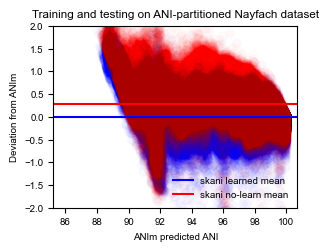

In [3]:
cmap = sns.color_palette("muted")
cm = 1/2.54  # centimeters in inches
plt.rcParams.update({'font.size': 7})
plt.rcParams.update({'font.family':'arial'})
fig = plt.figure(figsize=(8*cm, 6*cm))

plt.plot(anims,skani_diffs,'o', alpha = 0.01, color = 'blue')
plt.plot(anims,skani_nt_diffs,'o', alpha = 0.01, color = 'red')
plt.axhline(np.mean(skani_diffs), color= 'blue', label = 'skani learned mean')
plt.axhline(np.mean(skani_nt_diffs), color = 'red', label = 'skani no-learn mean')
plt.legend(frameon=False)
plt.xlabel("ANIm predicted ANI")
plt.ylabel("Deviation from ANIm")
plt.ylim([-2,2])
plt.title("Training and testing on ANI-partitioned Nayfach dataset")
plt.savefig("../final_figures/nayfach_partition.png", dpi = 300,bbox_inches='tight',pad_inches=0.1,)
